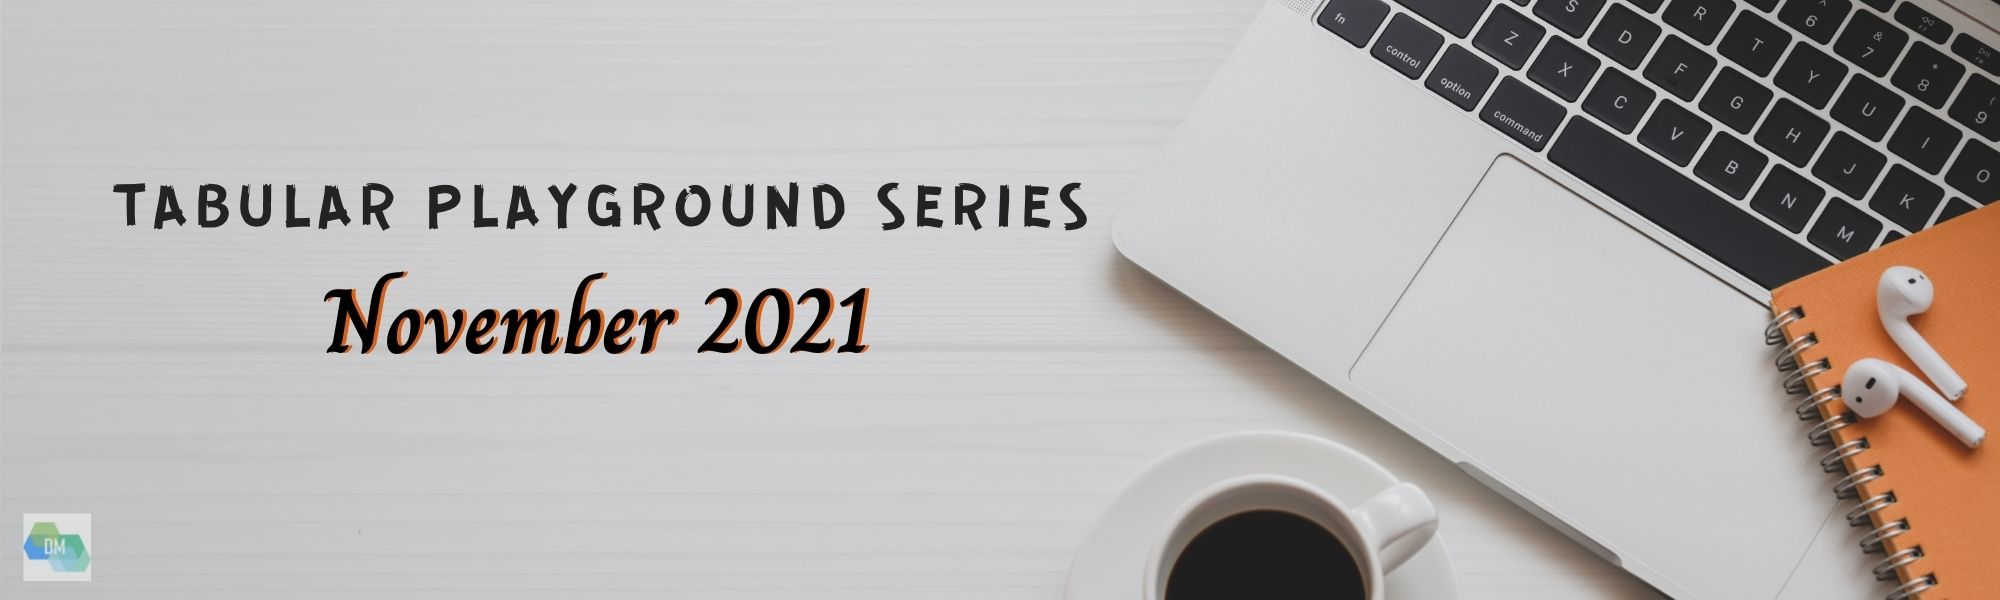

**Observations on this TPS:**
- `target` column is the target variable
- `Train` dataset has `600,000` rows and `102` columns which contains`100` features (f0-f99), `1` target variable `target` and `1` column of `id`
- `Test` dataset has `540,000` rows and `101` columns which contains`100` features (f0-f99) and `1` column of `id`
`target` and `1` column of `id`
- No missing values in train and test dataset


<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train = dt.fread("../input/tabular-playground-series-nov-2021/train.csv").to_pandas()
df_test = dt.fread("../input/tabular-playground-series-nov-2021/test.csv").to_pandas()
df_subm = dt.fread("../input/tabular-playground-series-nov-2021/sample_submission.csv").to_pandas()

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#ffbe0b","#fb5607","#ff006e","#8338ec","#3a86ff"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size = 1.2)
plt.tick_params(axis ='both', labelsize=0, length = 0)

In [ ]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

In [ ]:
df_test.describe().T

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 18px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">There are no missing values.</p>

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
df_train.target.value_counts()

In [ ]:
x = df_train['target'].value_counts()

fig,ax = plt.subplots(figsize = (7,4))
ax.barh([1],x.values[1], height = 0.7, color ='#8338ec',alpha = 0.7)
plt.text(-43000,1, 'False', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(310000,1, '49.4%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0], height = 0.7, color ='#fb5607',alpha = 0.7)
plt.text(-38000,0,'True',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(313000,0, '50.6%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,2.2, 'How target is distributed? - True vs False',{'font': 'Trebuchet MS','weight':'bold','Size': '24','style':'normal', 'color':'#3a86ff'}, alpha = 0.9)
plt.text(400000,1.65, 'False ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#8338ec'},alpha = 0.8)
plt.text(445000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(455000,1.65, 'True',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#fb5607'},alpha = 0.7)
plt.text(-50,1.8, 'Nearly equal distribution',{'font': 'Trebuchet MS','Size': '14','style':'normal', 'color':'#ff006e'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths =.6)
plt.title('Correlation')
plt.show()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color:#3a0ca3;">All the features are  weakly correlated.</p>
  

In [ ]:
corr_loss = df_train.corr()
plt.figure(figsize=(24,8))
corr_loss["target"][:-1].plot(kind="bar",grid=True)
plt.title("Features correlation")

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">Features Distribution</p>

Distribution of all features (f0-f99) that are available in train and test dataset are shown below. Because there are 100 features (f0-f99), 20 features are represented in each sections.`Blue` represents train dataset while `yellow` represents test dataset

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f0 - f19) </centre></strong></h3>

In [ ]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[0:20]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f20 - f39) </centre></strong></h3>

In [ ]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[20:40]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f40 - f59) </centre></strong></h3>

In [ ]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[40:60]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f60 - f79) </centre></strong></h3>

In [ ]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[60:80]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f80 - f99) </centre></strong></h3>

In [ ]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[80:100]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>AutoGluon ⏳</centre></strong></h3>

In [ ]:
pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
time = 7200
pred = TabularPredictor(label ='target', eval_metric = 'roc_auc').fit(train_data = df_train, time_limit = time, presets ='best_quality', verbosity = 2)
result = pred.fit_summary()
result

In [ ]:
y_pred = pred.predict_proba(df_test)
df_subm['target'] = y_pred.iloc[:, -1].values
df_subm.to_csv("submission_autogluon.csv", index=False)
df_subm

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>H2O ⏳</centre></strong></h3>

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

In [ ]:
train = df_train.drop('id',axis=1)
test = df_test.drop('id',axis=1)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

In [ ]:
x = train.columns
y = "target"
x.remove(y)

aml = H2OAutoML(max_models = 30, nfolds = 5, seed = 1,max_runtime_secs = 1600)
aml.train(x = x, y = y, training_frame = train)

In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

In [ ]:
model_plot = aml.model_correlation_heatmap(train)

In [ ]:
pred_1 = aml.leader.predict(test).as_data_frame()['True']

In [ ]:
df_subm['target'] = pred_1

In [ ]:
df_subm.to_csv('submission_h2o.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>